**Analyzing Retail Fuel Price Dynamics in New
South Wales (2016–2025)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fuel_price_df = pd.read_csv("fuelPrice_NSW.csv")

1.1 data cleaning and visualisation

In [ ]:
# handling missing values (there aren't any..?)
print(f"no. of missing values: \n{fuel_price_df.isnull().sum()}")

# parse PriceUpdatedDate into date/time; ensuring Price is numeric (cents per litre)
fuel_price_df["Date"] = fuel_price_df["PriceUpdatedDate"].apply(lambda row: row[0:10])
fuel_price_df["Time"] = fuel_price_df["PriceUpdatedDate"].apply(lambda row: row[11:])
# fuel_price_df.drop(["PriceUpdatedDate"], axis=1, inplace=True)

# ensure Price is numeric
fuel_price_df["Price"] = pd.to_numeric(fuel_price_df["Price"])
print(f"price is numeric -> price datatype: {fuel_price_df['Price'].dtypes} (cents/litre)")

# dropping exact duplicates
initial_len = len(fuel_price_df)
fuel_price_df.drop_duplicates(inplace=True)
final_len = len(fuel_price_df)
print(f"dropped {initial_len - final_len} exact duplicate rows")

# dropping implausible prices (< 50c/litre or > 300c/litre)
print(f"current min: {min(fuel_price_df['Price'])} | current max: {max(fuel_price_df['Price'])}")
# values justified in report
min_price_threshold = 60
max_price_threshold = 210

initial_len = len(fuel_price_df)
fuel_price_df = fuel_price_df[(fuel_price_df["Price"] >= min_price_threshold) & (fuel_price_df["Price"] <= max_price_threshold)]
final_len = len(fuel_price_df)
print(f"dropped {initial_len - final_len} implausible priced rows (< {min_price_threshold}c/l or > {max_price_threshold}c/l)")
print(f"current min: {min(fuel_price_df['Price'])} | current max: {max(fuel_price_df['Price'])}")

# aggregating to daily table per fuelcode by min price
daily_table = fuel_price_df.groupby(["Date", "FuelCode"])["Price"].min().reset_index()
daily_table.rename(columns={"Price": "MinPrice"}, inplace=True)

print(f"daily table per fuel by min price: \n{daily_table}")

no. of missing values: 
ServiceStationName    0
FuelCode              0
PriceUpdatedDate      0
Price                 0
Latitude              0
Longitude             0
Date                  0
Time                  0
dtype: int64
price is numeric -> price datatype: float64 (cents/litre)
dropped 0 exact duplicate rows
current min: 60.9 | current max: 209.9
dropped 0 implausible priced rows (< 60c/l or > 210c/l)
current min: 60.9 | current max: 209.9
daily table per fuel by min price: 
            Date FuelCode  MinPrice
0     2016-08-01      E10     101.9
1     2016-08-01      P95     114.9
2     2016-08-01      P98     119.9
3     2016-08-01      U91     103.9
4     2016-08-02      E10      99.9
...          ...      ...       ...
15440 2025-08-31      LPG     115.9
15441 2025-08-31      P95     178.9
15442 2025-08-31      P98     185.9
15443 2025-08-31      PDL     188.9
15444 2025-08-31      U91     163.9

[15445 rows x 3 columns]


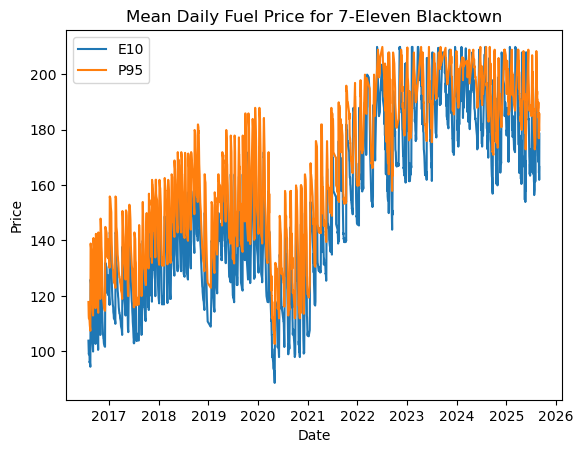

Text(0.5, 1.0, 'Violin plot of mean daily price across available fuel codes')

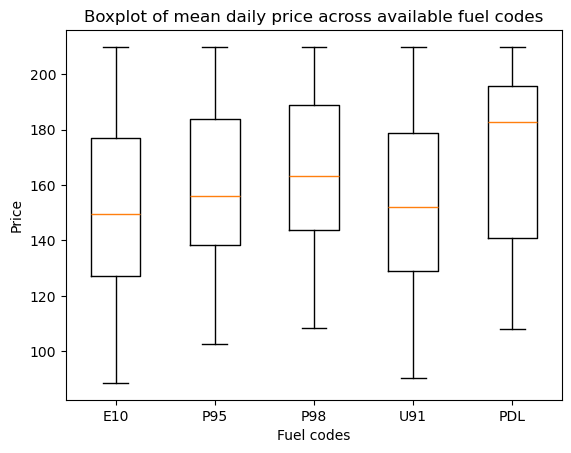

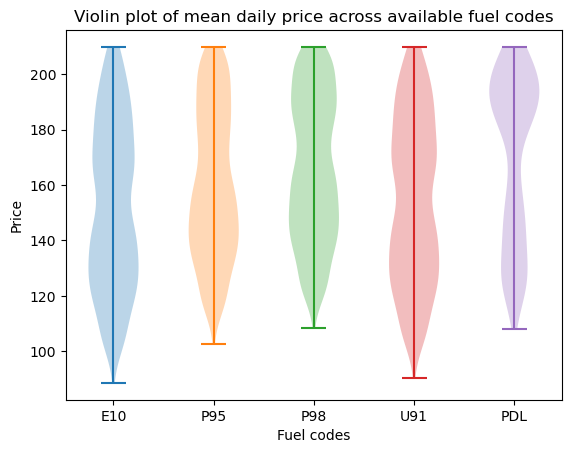

In [45]:
# for Blacktown fuel station
blacktown = fuel_price_df[fuel_price_df["ServiceStationName"] == "7-Eleven Blacktown"]

# find daily (mean) values
daily_table_blacktown = blacktown.groupby(["Date", "FuelCode"])["Price"].mean().reset_index()

# make "Date" into pd datetime format
daily_table_blacktown["Date"] = pd.to_datetime(daily_table_blacktown["Date"])

# visualising
E10_plot = daily_table_blacktown[daily_table_blacktown["FuelCode"]=="E10"]
P95_plot = daily_table_blacktown[daily_table_blacktown["FuelCode"]=="P95"]

plt.figure()
plt.plot(E10_plot["Date"], E10_plot["Price"], label="E10")
plt.plot(P95_plot["Date"], P95_plot["Price"], label="P95")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Mean Daily Fuel Price for 7-Eleven Blacktown")
plt.legend()
plt.show()

# box plot comparing daily prices across all available FuelCodes for one fuel station
all_fuel_codes = daily_table_blacktown["FuelCode"].unique()
positions = range(len(all_fuel_codes))

plt.figure()
for i, fuel_code in enumerate(all_fuel_codes):
    plt.subplot()
    plt.boxplot(daily_table_blacktown[daily_table_blacktown["FuelCode"]==fuel_code]["Price"], positions=[i], widths=0.5)
    
plt.xticks(positions, all_fuel_codes)
plt.xlabel("Fuel codes")
plt.ylabel("Price")
plt.title("Boxplot of mean daily price across available fuel codes")

# violin plot comparing daily prices across all available FuelCodes for one fuel station
plt.figure()
for i, fuel_code in enumerate(all_fuel_codes):
    plt.subplot()
    plt.violinplot(daily_table_blacktown[daily_table_blacktown["FuelCode"]==fuel_code]["Price"], positions=[i], widths=0.5)
    
plt.xticks(positions, all_fuel_codes)
plt.xlabel("Fuel codes")
plt.ylabel("Price")
plt.title("Violin plot of mean daily price across available fuel codes")

1.2 forecasting next-day prices